## Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
df=sns.load_dataset('iris')

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
# seprating independent and dependent variable
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

In [12]:
# here by default i have created overfitted decision tree. because i havent chosen any depth.

[Text(418.5, 498.3, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 407.70000000000005, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),

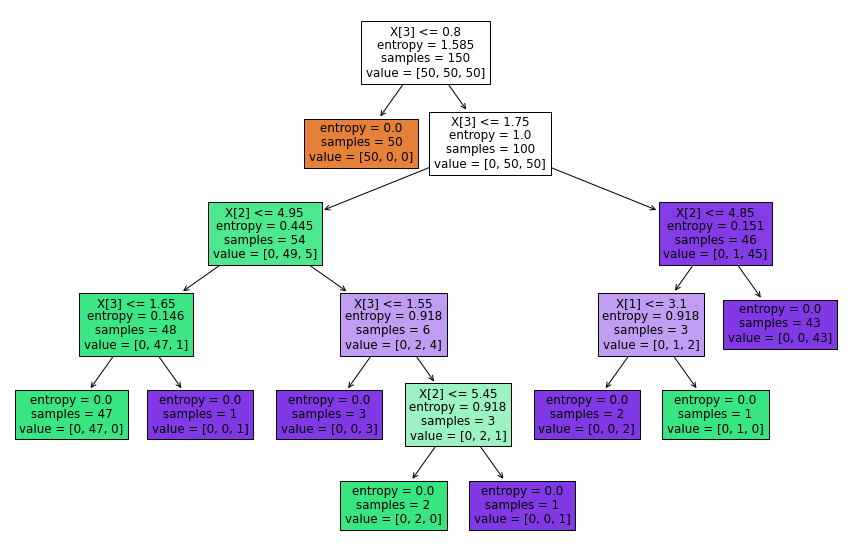

In [13]:
# constructing a decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

    Above tree is overfitted tree.
    I can do pruning at 3rd node.
    Entropy will be ranging b/w 0-1 (do not see root node)

    When i have many features it is difficult to see decision tree so this is major disadvantage
    When we have many features never do post pruning.
    Pre pruning should be done using grid search cv

In [18]:
# doing post pruning

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
# seprating independent and dependent variable
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(334.8, 453.0, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(334.8, 90.59999999999997, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(669.6, 90.59999999999997, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

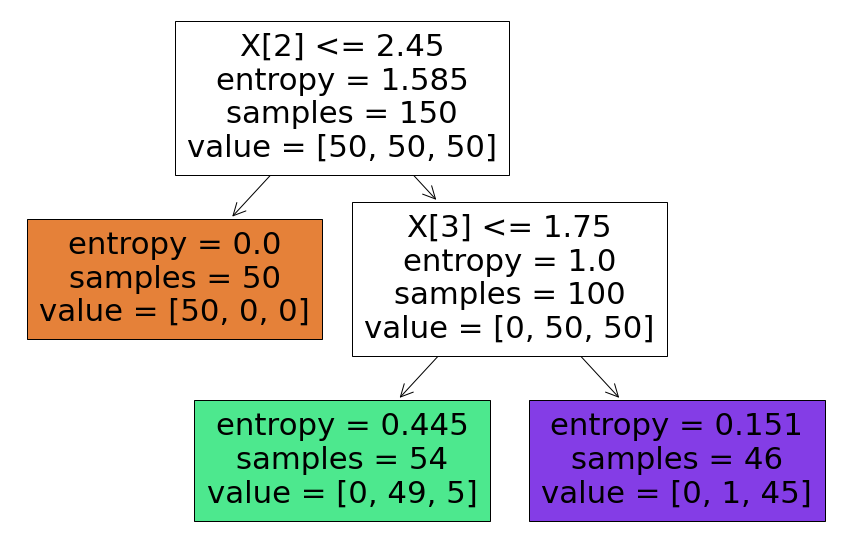

In [19]:
# constructing a decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [20]:
# Using GINI Index

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
# seprating independent and dependent variable
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier()

[Text(418.5, 498.3, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.

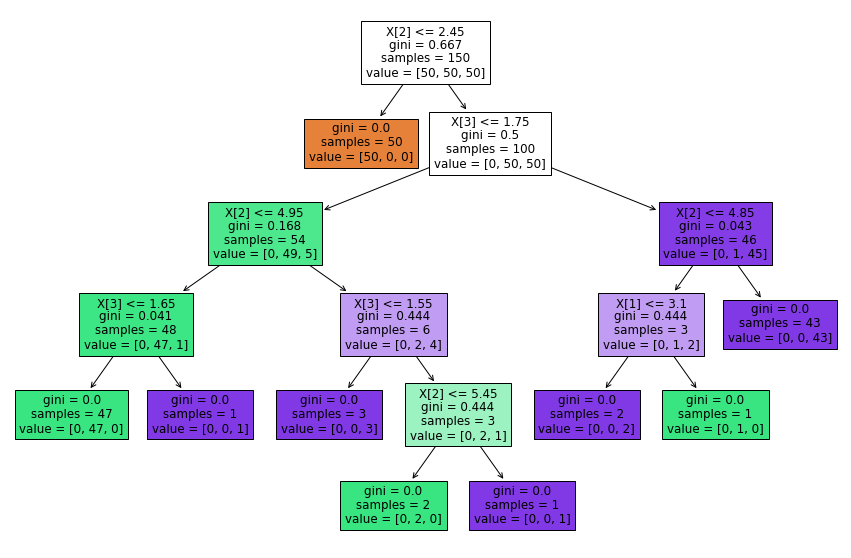

In [21]:
# constructing a decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [22]:
# In gini i can also use post pruning at depth =2

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',max_depth=2)
# seprating independent and dependent variable
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 453.0, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(334.8, 90.59999999999997, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(669.6, 90.59999999999997, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

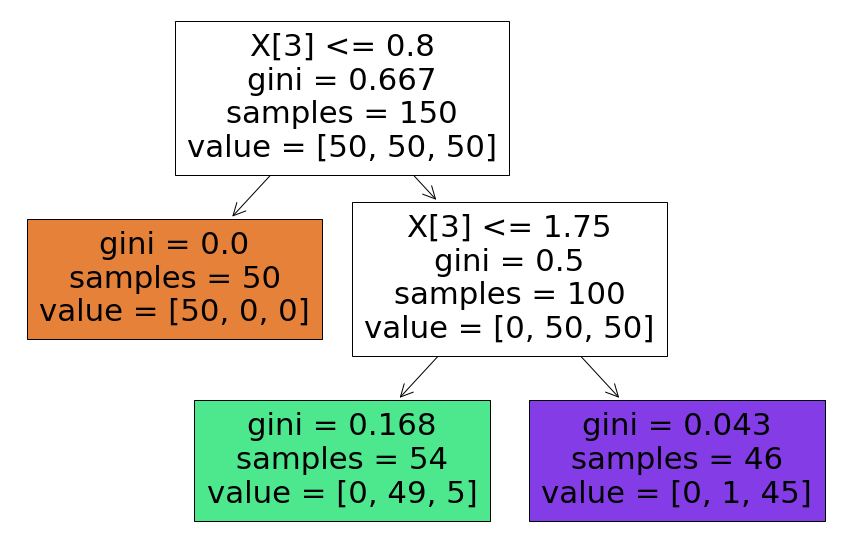

In [23]:
# constructing a decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [24]:
# Assignment
# Pre pruning, grid search cv and cross val score
# Decision tree regressor

## SVM Kernels Indepth Intuition And Practical Explanation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

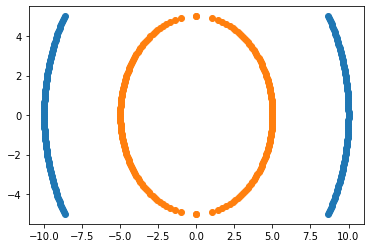

In [3]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [4]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [5]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [6]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
y_train

50     1
63     0
112    1
159    0
83     1
      ..
123    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [8]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [9]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

In [11]:
# Using kernel = linear i am getting 45% accuracy
# so it is not linear seperable

In [23]:
# Now applying polynomial kernel

In [24]:
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


### Polynomial Kernel
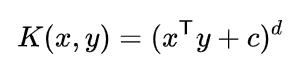

In [25]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [14]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = 0)

In [27]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [28]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [29]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [30]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [32]:
from sklearn.linear_model import LogisticRegression
class_reg=LogisticRegression()

In [34]:
class_reg.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Practise Dataset

In [4]:
import pandas as pd

In [9]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [10]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [13]:
df.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side','pressure level']

In [14]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [18]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [19]:
### First do train test split
from sklearn.model_selection import train_test_split

In [23]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


In [27]:
# now EDA

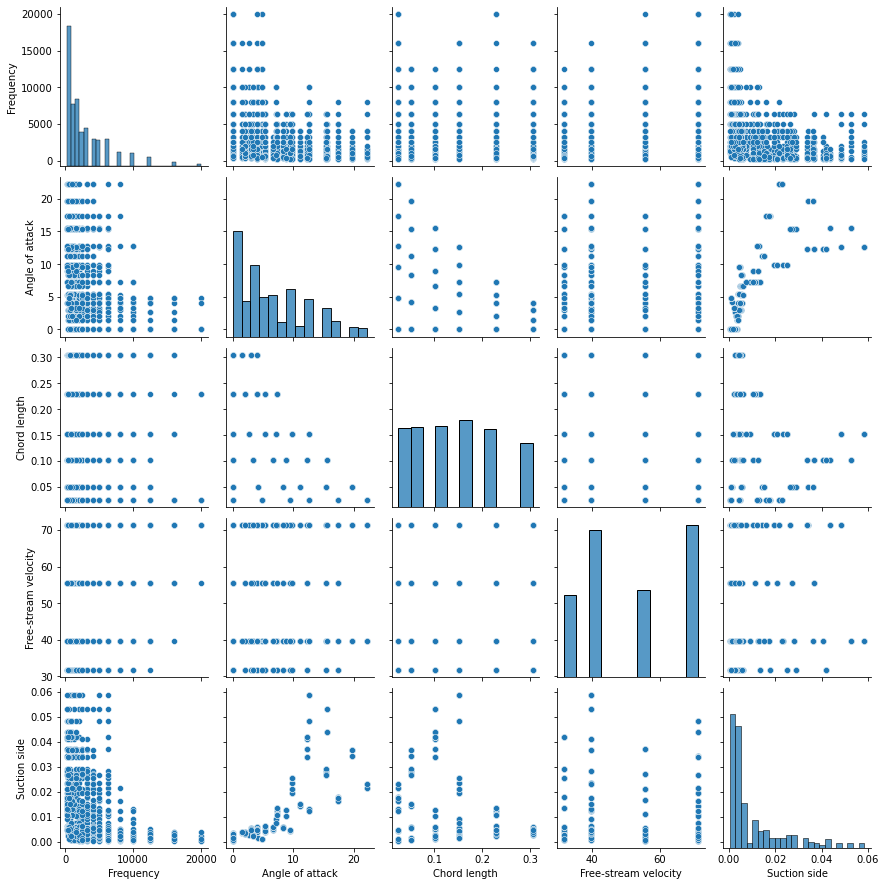

In [30]:
import seaborn as sns
sns.pairplot(X_train)

In [31]:
# checking coorelation
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


In [33]:
# Angle of attack and suction side showing 76% correlation
# We can also use pandas profiling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

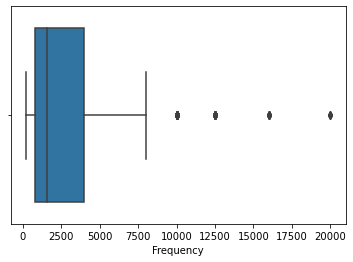

In [34]:
sns.boxplot(X_train['Frequency'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='pressure level'>

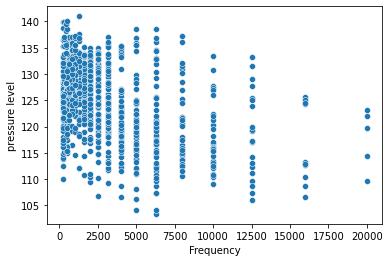

In [40]:
sns.scatterplot(X_train['Frequency'],y)

In [42]:
len(df['pressure level'].unique())

1456

In [43]:
# len is 1456 so above problem is a regression problem

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pressure level'>

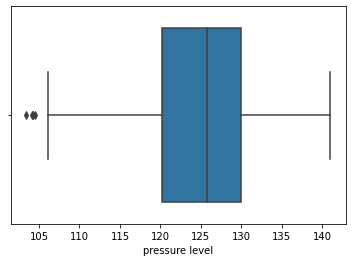

In [45]:
sns.boxplot(df['pressure level'])

In [46]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [48]:
!pip install flask

In [49]:
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37

# Kmeans Clustering

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv('Customers.csv')

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
#Independent features
X=dataset.iloc[:,[3,4]].values

In [17]:
# using elbow method to find optimal no of clusters
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


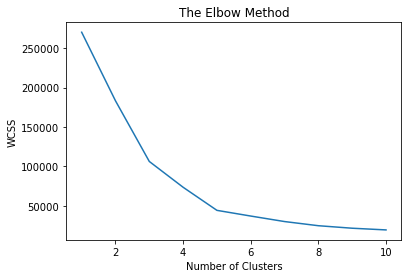

In [21]:
# with in cluster sum of squares
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#select k value as 5 from last abrupt change,
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

In [23]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [24]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

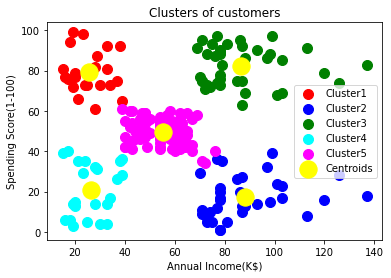

In [25]:
#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# Hierarchical Mean Clustering

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
dataset=pd.read_csv('Customers.csv')

In [28]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
X=dataset.iloc[:,[3,4]].values

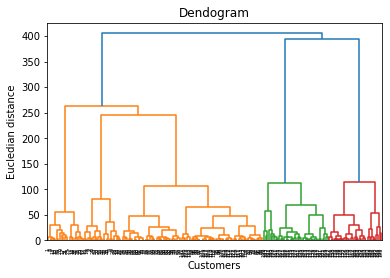

In [39]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian distance')
plt.show()

In [40]:
# now choosing the longest vertical line where no horizontal line passes
# it passes through 5 points so k==5
from sklearn.cluster import AgglomerativeClustering
# AgglomerativeClustering is another name of hiererchical clustering

In [42]:
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')

In [43]:
hc.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [44]:
y_hc=hc.fit_predict(X)

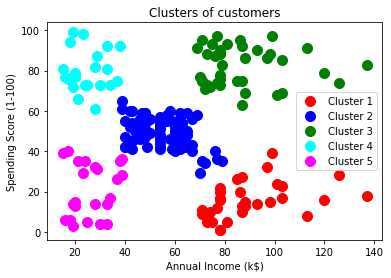

In [46]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Validating the clusters

# Silhouette clustering

In [47]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [54]:
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10,10),shuffle=True)

In [57]:
X

array([[ 2.81717990e+00,  1.30247233e+00],
       [-1.73403480e+00, -6.14543196e-02],
       [-8.05107257e+00,  6.83332281e+00],
       [-5.41842803e+00,  5.48269380e+00],
       [-8.10873797e+00,  6.93152888e+00],
       [-5.55220033e+00,  5.76012174e+00],
       [-6.15080428e+00,  7.05279096e+00],
       [-7.79976453e+00,  6.45919555e+00],
       [-4.47885073e+00,  6.50900760e+00],
       [-8.89821004e+00,  5.71466456e+00],
       [-5.93419552e+00,  5.73701937e+00],
       [-4.89679525e+00,  4.35274053e+00],
       [-6.52084048e+00,  4.93471419e+00],
       [-8.99580693e+00,  1.00592124e+01],
       [-7.93978104e+00,  6.75454279e+00],
       [-8.40376904e+00,  7.64099860e+00],
       [-5.93590002e+00,  5.35137264e+00],
       [-6.48394565e+00,  5.72155119e+00],
       [-6.09416577e+00,  5.97680990e+00],
       [-7.46258658e+00,  5.76978246e+00],
       [-6.23009298e+00,  5.59241971e+00],
       [-7.99314794e+00,  3.27073165e+00],
       [-8.46341796e+00,  5.92691827e+00],
       [-6.

In [58]:
y

array([3, 3, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1,
       1, 1, 3, 3, 3, 1, 1, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 1, 2, 1, 1, 3,
       0, 3, 1, 0, 1, 2, 3, 3, 1, 3, 3, 3, 0, 3, 3, 1, 1, 2, 3, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 3, 1, 3, 2, 2, 0, 2, 0, 1, 3, 0, 3, 2, 1, 2,
       2, 1, 3, 2, 1, 3, 0, 0, 3, 0, 1, 0, 2, 1, 2, 0, 3, 0, 0, 0, 0, 2,
       1, 3, 2, 1, 0, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 2,
       3, 0, 3, 1, 0, 1, 0, 0, 2, 3, 3, 3, 3, 2, 3, 0, 0, 2, 3, 1, 2, 1,
       2, 2, 2, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3,
       1, 0, 3, 3, 2, 3, 3, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1,
       3, 2, 3, 1, 0, 0, 0, 2, 0, 3, 2, 0, 3, 1, 2, 0, 2, 3, 0, 0, 2, 2,
       2, 0, 3, 2, 0, 1, 0, 0, 3, 1, 0, 2, 2, 1, 3, 1, 2, 3, 3, 0, 0, 1,
       1, 1, 3, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 3, 2, 1, 3, 2, 0, 2, 2, 0,
       2, 3, 3, 0, 0, 1, 1, 0, 3, 0, 2, 0, 2, 3, 3, 0, 0, 3, 0, 1, 3, 1,
       0, 1, 2, 0, 0, 1, 2, 3, 2, 3, 2, 2, 3, 2, 0,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


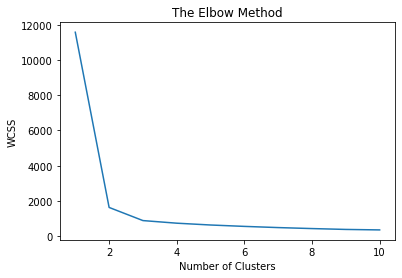

In [59]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()    

In [61]:
cluster_model=KMeans(n_clusters=4,init='k-means++')
cluster_labels=cluster_model.fit_predict(X)
print(cluster_labels)

[1 1 3 0 3 0 2 3 0 3 0 0 0 2 3 2 0 0 0 3 0 0 3 3 1 1 1 0 3 0 1 2 1 1 1 1 0
 1 1 0 2 0 2 1 0 1 0 3 0 2 1 1 0 1 1 1 0 1 1 0 0 0 1 0 3 3 3 0 0 0 3 0 2 1
 3 1 3 0 3 2 0 2 1 0 1 2 3 3 2 0 1 2 3 1 0 3 1 0 0 0 2 3 3 2 1 0 0 0 0 2 0
 1 3 0 0 1 1 1 1 1 0 1 2 1 1 0 3 3 3 1 1 2 1 0 1 0 0 3 0 0 2 1 1 1 1 2 1 0
 0 2 1 3 2 3 2 3 2 0 2 1 3 3 0 1 2 0 1 2 2 1 0 2 0 2 2 1 3 0 1 1 2 1 1 3 2
 2 0 3 3 0 0 2 0 2 2 0 0 0 1 2 1 0 3 0 0 2 3 1 2 0 1 3 2 0 3 1 3 0 3 2 2 0
 1 3 0 0 0 0 1 3 0 2 2 0 1 0 2 1 1 2 0 3 0 3 1 2 0 3 3 2 0 2 0 3 3 1 2 0 1
 2 0 2 2 0 2 1 1 0 0 0 0 0 1 0 2 0 2 1 1 0 0 1 3 3 1 0 3 3 2 0 0 3 3 1 2 1
 3 3 1 2 0 2 0 1 0 0 0 0 0 0 2 3 1 1 1 2 3 3 3 0 3 2 3 0 0 1 1 1 3 3 0 0 0
 0 1 0 2 1 2 0 0 2 1 2 0 0 2 1 3 2 0 0 0 0 1 3 1 0 2 0 2 2 0 3 1 3 0 3 2 0
 0 0 2 0 0 1 0 0 2 2 1 0 1 2 0 0 0 0 2 0 1 1 0 0 0 3 3 1 3 0 2 2 2 2 0 0 0
 1 0 0 3 2 3 3 0 3 0 1 0 1 0 1 3 1 0 0 1 2 2 2 3 3 0 3 1 0 1 2 1 3 2 0 1 3
 0 0 2 3 3 2 0 0 1 3 2 3 0 0 1 3 0 1 3 3 1 3 0 1 1 1 2 0 0 3 0 3 2 0 1 0 3
 0 0 0 0 3 3 0 1 1 0 1 3 

For n_clusters = 2 The average silhouette_score is : 0.7839226293519105
For n_clusters = 3 The average silhouette_score is : 0.5499984782538069
For n_clusters = 4 The average silhouette_score is : 0.47002601005602723
For n_clusters = 5 The average silhouette_score is : 0.4489988082060165
For n_clusters = 6 The average silhouette_score is : 0.44710645374915897


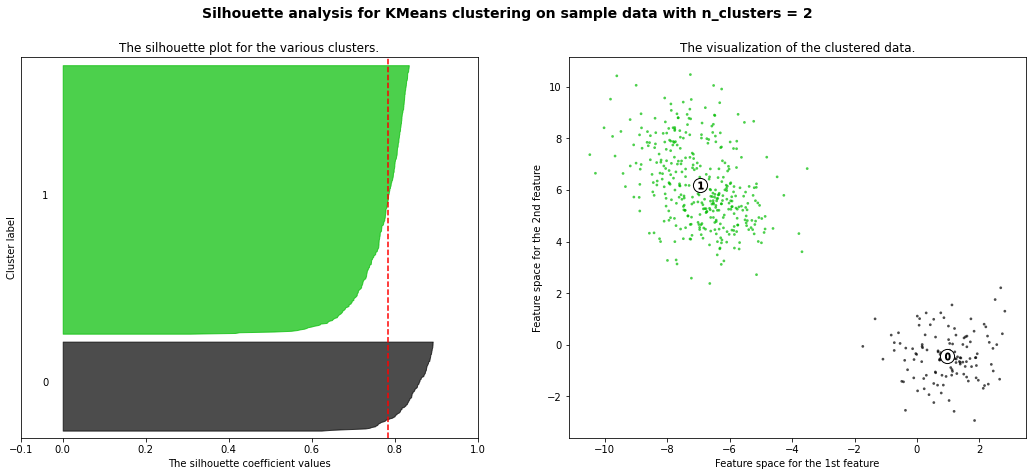

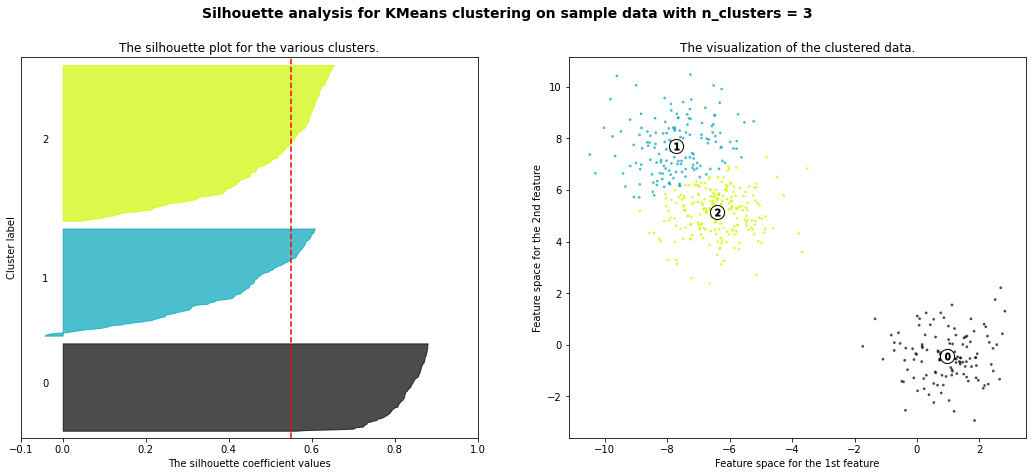

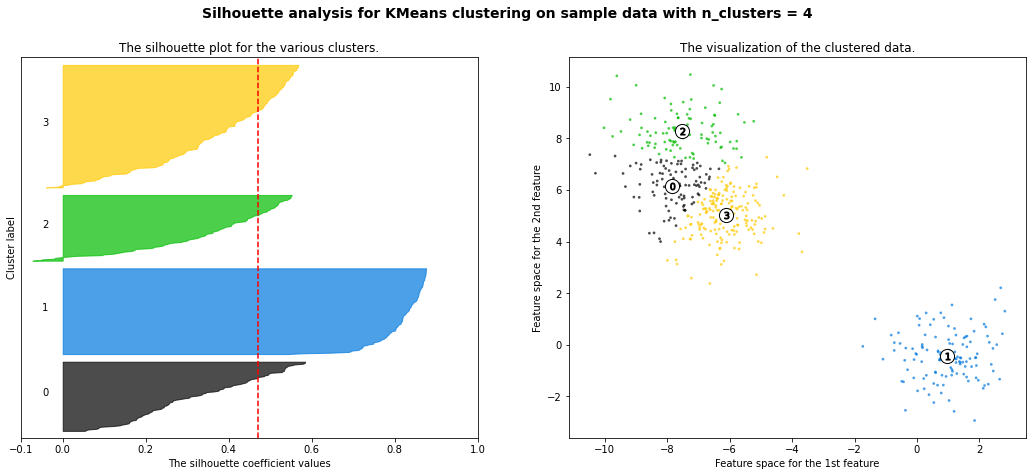

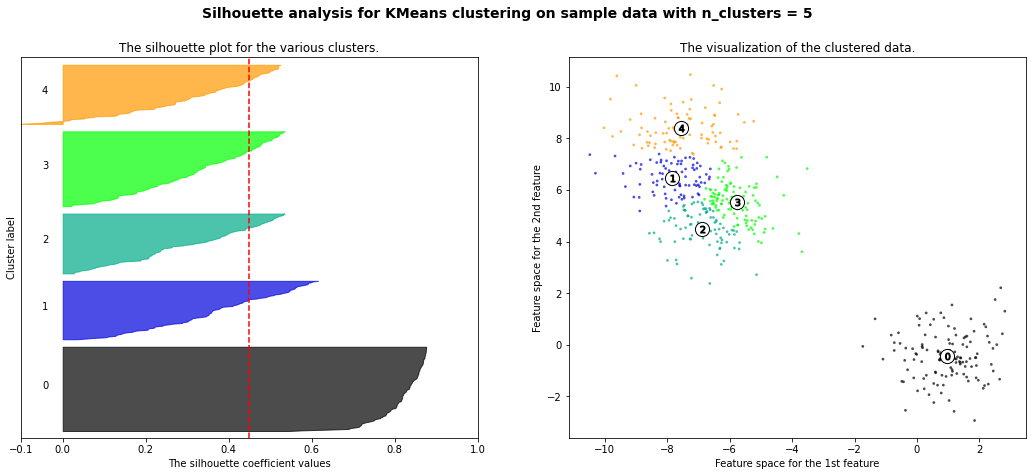

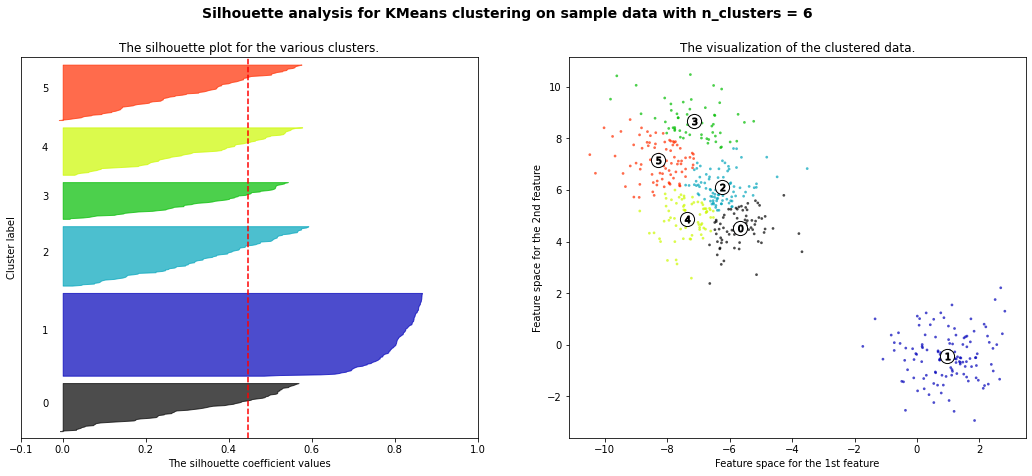

In [63]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()